In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

# Краснощекова Яна

In [2]:
# задание 1 балл (сум 1)
# загрузить данные, индекс - переменная вида дата/время

data = pd.read_csv('crime.csv.zip', parse_dates = True, index_col = ['Unnamed: 0'])
data.head()

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08


In [3]:
# задание 1 балл (сум 2)
# построить сводную таблицу по клоличеству 
# правонарушений (строки - пол (driver_gender), колонки - расса (driver_race))

pd.crosstab(data.driver_gender, data.driver_race, aggfunc = 'count', values='id')

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,1022,1339,579,75,96096
M,2424,4232,1983,188,165243


In [4]:
# задание 1 балл (сум 3)
# построить сводную таблицу 
# в таблице строки - пол, колонки - расса
# значения проценты в зависимости от рассы и пола внутри 
# рассы (например, белые мужчины 0.8, белые женщины 0.2)
# сумарно по колонке должно получаться 1

data2 = pd.crosstab(data.driver_gender, data.driver_race,
                    aggfunc = 'count', values='id', normalize = 'columns')
data2

driver_race,Asian,Black,Hispanic,Other,White
driver_gender,,,,,
F,0.296576,0.240352,0.225995,0.285171,0.367706
M,0.703424,0.759648,0.774005,0.714829,0.632294


<AxesSubplot:xlabel='driver_race'>

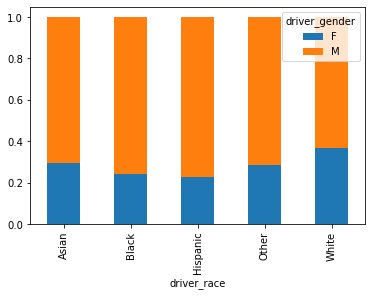

In [5]:
# задание 1 балл (сум 4)
# результат предидущей таблицы визуализировать на столбцовом графике с высотой столбца 1 для каждой рассы и 
# разделением внутри по полу (внимание! подписи на графике)
# seaborn так просто это делать не умеет используйте matplotlib

#data2.plot(kind = 'bar', stacked = True)
data3 = data2.transpose().copy()
data3.plot(kind = 'bar', stacked = True)

In [6]:
# задание 1 балла (сум 5)
# какое кодичество правонарушений  по видам нарушений (violation) 
# зафиксированны для мужчин и женщин (driver_gender)
# обязательно посчитать суммы по строкам/столбцам
# в таблице не должны быть np.nan (только числа)
# все оформить в виде одной сводной таблицы

pd.crosstab(data.driver_gender, data.violation, aggfunc = 'count', values='id', margins = True).fillna(0)

violation,DUI,Equipment,Moving violation,Other,Other (non-mapped),All
driver_gender,,,,,,
F,198.0,18755.0,76717.0,3441.0,0.0,99111
M,513.0,31845.0,135383.0,6327.0,2.0,174070
All,711.0,50600.0,212100.0,9768.0,2.0,273181


<AxesSubplot:xlabel='day'>

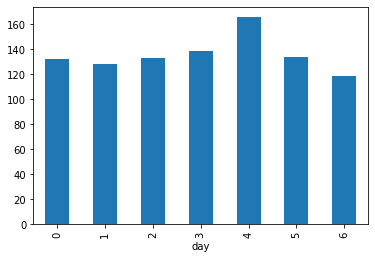

In [7]:
# задание 1 балл (сум 6)
# зависит ли количество правонарушений в среднем от дня недели (рабочий Пн-Пт или выходной Сб-Вс)
# визуализировать результат
# когда больше всего нарушений?

data4 = data.resample('D').count()
data4['day'] = data4.index.dayofweek
data4.groupby('day').mean()['id'].plot(kind = 'bar')
#получается, больше всего в 4-й день
#наверное, это ПЯТНИЦА

## Неадекватный  водитель (Driving under the influence (DUI))
отсюда и ниже работам только с водителями под воздействием веществ (4 балла)

1. Отобрать водителей DUI
2. Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)
3. Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор).
4. Для выделенных частей проанализировать среднее количество правонарушений по часам суток, есль ли разница (если есть то в чем). 

Внимание! На каждой оси X должны стоять не абстрактные числа, а например часы или дни недели.

In [8]:
# задание 1 балл (сум 7)
# Отобрать водителей DUI

dui = data[data['violation'] == 'DUI']
dui.head()

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
2010-07-04 01:38:00,VT-2010-00910,VT,Waterbury,Washington County,50023.0,VT RT 18,ST JOHNSBURY VSP,M,29.0,29.0,...,White,Suspicion of DWI,DUI,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-9.697686e+08
2010-07-04 15:50:00,VT-2010-01035,VT,Sherburne,Chittenden County,50007.0,VT RT 103,RUTLAND VSP,F,27.0,27.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,-2.980731e+08
2010-07-05 23:40:00,VT-2010-01535,VT,Guildhall,Essex County,50009.0,2000 I 91 N; MM2 I 91 N,BRATTLEBORO VSP,F,25.0,25.0,...,Asian,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Citation,False,3.644600e+08
2010-07-07 14:00:00,VT-2010-01722,VT,Waterford,Caledonia County,50005.0,MAD BROOK RD,ST JOHNSBURY VSP,M,41.0,41.0,...,White,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Written Warning,False,5.863135e+08
2010-07-10 21:35:00,VT-2010-02178,VT,East Montpelier,Washington County,50023.0,VT RT 14 N,MIDDLESEX VSP,M,50.0,50.0,...,Hispanic,Suspicion of DWI,DUI,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09


<AxesSubplot:xlabel='day'>

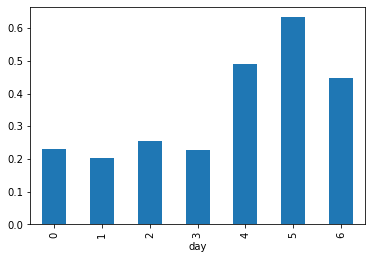

In [9]:
# задание 1 балл (сум 8)
# Проанализировать количество нарушений в среднем в зависимости от дня недели (визуализировать)

data5 = dui.resample('D').count()
data5['day'] = data5.index.dayofweek
data5.groupby('day').mean()['id'].plot(kind = 'bar')

#получается, больше всего в 5-й день
#наверное, это СУББОТА

In [11]:
# задание 1 балл (сум 9)
# Разделить выборку на части исходя из среднего количества нарушений (пояснить выбор)

#видимо 0, 1, 2, 3 - будние дни (Пн, Вт, Ср, Чт) - тут поменьше 
#а 4, 5, 6 - выходные (Пт, Сб, Вс) - тут побольше
budny = data5[data5['day'].isin([0, 1, 2, 3])]
vihodni = data5[data5['day'].isin([4, 5, 6])]
display(budny.head())
display(vihodni.head())
#budny.shape[0] + vihodni.shape[0] == data6.shape[0]

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,day
2010-07-05,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
2010-07-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2010-07-07,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,2
2010-07-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2010-07-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,day
2010-07-04,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,1,2,2,2,2,6
2010-07-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2010-07-10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,5
2010-07-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2010-07-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [12]:
# задание 1 балл (сум 10)
# Для выделенных частей проанализировать среднее количество правонарушений 
# по часам суток, есль ли разница (если есть то в чем).

#budny_hours = budny.resample('3H').count()
#budny_hours['hours'] = budny_hours.index.time
#budny_hours
#budny_hours.groupby('hours').mean()['id'].plot(kind = 'bar')